In [4]:
#! pip install RespFeatureExtractor-1.0-py3-none-any.whl

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PeakDetection import Find_Peaks
from RespFeatureExtractor import RespFeatureExtract #Package Call


## Signal PreProcessing steps

### Step 1: Applying low pass Butterworth filter: This step would vary depending upon one's signal data extractions
There are three types of filters low-pass, high-pass, band-pass and band-stop. 

If the signal is complex, this step is needed, else not. There could be more steps required but that all comes under signal processing which is not the part of the paper. But just to give a simple pipeline experience we are providing a simple step of Butterworth low pass filter here.


#### Hydraulic Bed Sensor Data: 
Example.csv contains the signal values from hydraulic bed sensor (HBS), which collects data unobtrusively. This sensor is placed under the mattress, while an individual can sleep comfortably on top of the mattress. Data is collected as pressure signals from top of the mattress. HBS is highly sensitive to capture the small change in pressure forces generated and transferred through the mattress due to residents’ heartbeats, respiration, and restless movements. 

In [2]:
#Signal Import
Signal=pd.read_csv("Example_Signal.csv",index_col=False)
Signal.head()

,Signal_values,TimeStamp
0,2077,2019-03-01 01:55:25.205
1,2073,2019-03-01 01:55:25.215
2,2070,2019-03-01 01:55:25.225
3,2072,2019-03-01 01:55:25.235
4,2081,2019-03-01 01:55:25.245


In [3]:
print(Signal.dtypes)

Signal_values     int64
TimeStamp        object
dtype: object


#### Plotting part of original signal

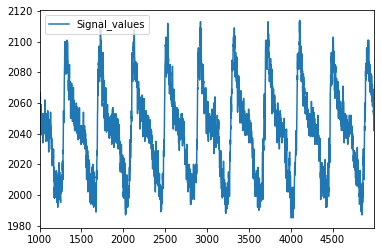

In [4]:
# Plot Signal
Signal[1000:5000].plot()

#### Apply Butterworth filter

In [5]:
# Apply Butter worth
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data):
    filterorder = 2 
    fc_down=0.7
    cutoff=0.014 # fc_down/(fs/2) [fs is frequency of samples which is 100 samples/sec. This comes from previous signal processing steps]
    # Get the filter coefficients
    b, a = butter(filterorder, cutoff, btype='low')#,analog=True)#, analog=False)
    y = filtfilt(b, a, data)
    return y

Signal['Filtered_Signal_values']=butter_lowpass_filter(Signal['Signal_values'])
Signal=Signal.drop(columns=['Signal_values'])
#Signal.head()



#### Plot the Butterworth filtered signal

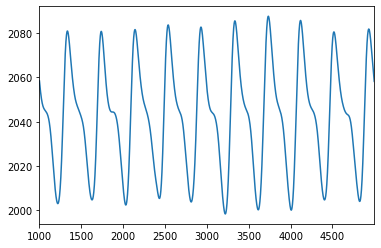

In [6]:
# Plot signal after butter worth
Signal['Filtered_Signal_values'][1000:5000].plot()

In [7]:
#Signal=Signal[1000:5000]

### Step 2: Peak Detection in Butterworth filtered signal

There are plenty of options to do peak detection. Below are few of the links to different kind of peak detection as per the signal data. Since we anticipate the data to come from different kind of sensor data so these links might help. However depending upon the suitability of the current signal, we are using a variation of the Scipy library's find_peaks to find peaks and valleys.
#https://stackoverflow.com/questions/50756793/peak-detection-algorithm-in-python
#https://www.samproell.io/posts/signal/peak-finding-python-js/
#https://github.com/MonsieurV/py-findpeaks




#### Finding peaks and valleys

In [8]:
# Find indices of peaks
Peaks_Valleys=Find_Peaks(Signal[['Filtered_Signal_values','TimeStamp']],'Filtered_Signal_values')
Peaks_Valleys.head()

,Label_PV,SignalValue_PV,TimeStamp_PV,INDEX
0,1,2091.639569,2019-03-01 01:55:25.535,29
1,-1,2041.238816,2019-03-01 01:55:26.965,172
2,1,2042.527869,2019-03-01 01:55:27.435,219
3,-1,2005.688170,2019-03-01 01:55:29.205,396
4,1,2080.047772,2019-03-01 01:55:30.295,505


#### Plotting peaks and valleys in the signal data (Showing a snippet of the whole signal)

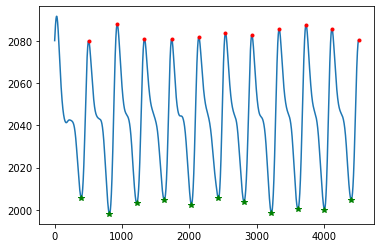

In [9]:
#Just to Plot, Subsetting 
df_Peaks=Peaks_Valleys[3:25]
Peaks_Index=df_Peaks[df_Peaks['Label_PV']==1]['INDEX'].to_list()
Valleys_Index=df_Peaks[df_Peaks['Label_PV']==-1]['INDEX'].to_list()
maxLimit=df_Peaks['INDEX'].max()
df_Peaks=df_Peaks.drop(columns=['INDEX'])


#Plot Peaks and Valleys
Signal.index += 1
Signal['index'] = np.arange(1, len(Signal)+1)

x = np.array(Signal['index'][0:maxLimit+5].to_list())
y = np.array(Signal['Filtered_Signal_values'][0:maxLimit+5].to_list()) #np.array()


plt.plot(x,y)
plt.plot(Peaks_Index, y[Peaks_Index], ".",color="red")
plt.plot(Valleys_Index, y[Valleys_Index], "*",color="green")
plt.show()

# <font color='blue'> RespFeatureExtractor </font>

## <font color='green'> For Package Functionality: (a) Feature extraction in the continuous signal data
For continuous data, this functionality is used. The data is automatically segmented into the window size provided by the user.</font>

### <font color='green'>Package Name:  RespFeatureExtract</font>
__Input Parameters are as follows:__

__PV__ (required): is the pandas dataframe name containing peaks and valleys label. Peaks should be labeled as 1 and valleys as -1.   
__Peak_Valley_Label__ (required): Takes the name of the column same which contains labels for peaks and valleys.  
__Sig_val_Col__ (required): Takes the name of the column which has corresponding signal values for peaks and valleys.  __timestamp_col__ (required): Take s the name of the column containing the timestamps for the corresponding peaks and valleys.  
__window__ (optional): Takes the window size in seconds, in which data need to be segmented. Default is 60 sec.  
__cpu_cores__ (optional): Takes the number of cpu cores you wish to use during this process. Default is cpu_cores=1.  

In [14]:
#import RespFeatureExtract
FeaturesExtracted=RespFeatureExtract(PV=Peaks_Valleys,Peak_Valley_Label='Label_PV',Sig_val_Col='SignalValue_PV',timestamp_col='TimeStamp_PV',window=60,cpu_cores=3)
FeaturesExtracted.head()


,Start,End,RMSSD,MDI,MADI,RespRate,RMS_DA,RMI,BPI
0,2019-03-01 01:57:28.200,2019-03-01 01:58:23.830,0.084735,0.070000,0.13,14,0.992770,0.409382,0.166013
1,2019-03-01 01:55:25.535,2019-03-01 01:56:22.830,0.503177,0.255833,1.22,16,0.989887,0.380938,0.219107
2,2019-03-01 01:56:25.640,2019-03-01 01:57:25.270,0.042426,0.036667,0.07,15,0.992143,0.382580,0.183292
3,2019-03-01 01:58:26.815,2019-03-01 01:59:24.565,0.185701,0.155000,0.31,14,0.993324,0.376427,0.168376
4,2019-03-01 01:59:25.725,2019-03-01 02:00:24.075,0.099800,0.076000,0.18,15,1.000799,0.382431,0.174789


## <font color='green'> For Package Functionality: (b) Feature extraction in the pre-segmented signal data </font>

This package is more focused on getting the features from a given segmented time window. In this case the user has the leverage to segment the data by themselves and then extract the features from time windows segmented by the user.

In [11]:
#Extract a short time window to build the example
from datetime import datetime
Peaks_Valleys['TimeStamp_PV'] = pd.to_datetime(Peaks_Valleys['TimeStamp_PV'])
start=Peaks_Valleys['TimeStamp_PV'].min()
end=pd.to_datetime(start + pd.to_timedelta(int(60), unit='s'))
Peaks_ValleysF=Peaks_Valleys[(Peaks_Valleys['TimeStamp_PV'] >= start) & (Peaks_Valleys['TimeStamp_PV']<=end)]


### <font color='green'>Package Name:  RespFeatureExtractFromSingleWindow</font>
The name of the subpackage is RespFeatureExtractFromSingleWindow and returns an array of features extracted from the given time window.

__Input parameters are as follows:

__PV__ (required): is the pandas dataframe name containing peaks and valleys label. Peaks should be labeled as 1 and valleys as -1.   
__Peak_Valley_Label__ (required): Takes the name of the column same which contains labels for peaks and valleys.  
__Sig_val_Col__ (required): Takes the name of the column which has corresponding signal values for peaks and valleys.  __timestamp_col__ (required): Take s the name of the column containing the timestamps for the corresponding peaks and valleys. 



In [13]:
# Extracting features from just one given segmented time window
from RespFeatureExtractor import RespFeatureExtractFromSingleWindow

x=[]
x=RespFeatureExtractFromSingleWindow(PV=Peaks_ValleysF,Peak_Valley_Label='Label_PV',Sig_val_Col='SignalValue_PV',timestamp_col='TimeStamp_PV')

print(x)


[Timestamp('2019-03-01 01:55:25.535000'), Timestamp('2019-03-01 01:56:22.830000'), 0.5031774041031652, 0.2558333333333333, 1.2200000000000002, 16, 0.9898865160701787, 0.38093828622169607, 0.21910696134339047]


/opt/conda/lib/python3.7/site-packages/RespFeatureExtractor/FeatureExtractor/ExtractFeatures.py:51: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

